## Oefening Monte Carlo simulatie

Op een PCB gebruikt een bedrijf een schakeling van vier condensatoren in serie.  

Zoals gekend kan de vervangcapaciteit berekend worden als: 

$$
\frac{1}{C_t} = \frac{1}{C_1} + \frac{1}{C_2} + \frac{1}{C_3} + \frac{1}{C_4}
$$

Bij een totale spanning van $V_t$ over de condenatoren kan de spanning over een individuele condensator als volgt berekend worden:

$$
V_x = \frac{C_t}{C_x}V_t
$$

De totale spanning is 10,6 V. Indien de vier condensatoren dezelfde capaciteit hebben, verdeelt de spanning zich gelijkmatig en staat over elke condensator een spanning van 2,65 V. Echter: het productieproces van de condensatoren zorgt voor een gaussiaanse verdeling van de capaciteiten met een gemiddelde van 15,9 F en een standaarddeviatie van 0,4985 F. Indien over een condensator een spanning komt te staan van meer dan 2,7 V ontstaat een risico op lekken en het falen van de PCB. 

Bereken via een Monte-Carlo simulatie het percentage van de schakelingen (van 4 condensatoren) waarbij over minstens één condensator een spanning komt te staan van > 2,7 V. 

Gebruik de volgend parametewaarden:

In [2]:
# parameters
condensators = 4
avg = 15.9
sigma = 0.4985
samplesize = 100000 # simuleer met 100.000 x 4 condensatoren. 
V_tot = 10.6
threshold = 2.7

In [3]:
import sys
import numpy as np


def MaxVoltage(C,V_tot): 
    nominator = 0.0
    for c in C:
        nominator += 1/c

    C_tot =  1/nominator
    V = [C_tot/c * V_tot for c in C]
    return max(V)


samples = np.random.normal(loc=avg,scale=sigma,size=(samplesize,condensators))

V_max = np.empty((0),dtype=float)
for sample in samples:
    V_max = np.r_[V_max,[MaxVoltage(sample,V_tot)]]

V_max = np.sort(V_max)    

print(f'Percentage above threshold: {(V_max > threshold).sum()*100/samplesize} %')




Percentage above threshold: 80.244 %


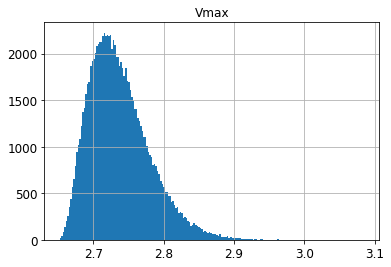

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
V_max_df =  pd.DataFrame(V_max,columns=['Vmax'])
V_max_df.hist(bins=200)
plt.show()

In [23]:
# getting data of the histogram
count, bins_count = np.histogram(V_max, bins=200)
count,bins_count


(array([  21,   42,   88,  137,  202,  259,  347,  436,  572,  651,  797,
         948, 1019, 1081, 1223, 1373, 1419, 1570, 1668, 1700, 1863, 1921,
        1945, 2002, 2083, 2102, 2128, 2123, 2189, 2224, 2192, 2200, 2184,
        2196, 2052, 2145, 2092, 1965, 1960, 1863, 1914, 1840, 1758, 1848,
        1709, 1693, 1612, 1533, 1495, 1402, 1403, 1303, 1272, 1221, 1170,
        1102, 1107, 1007,  941,  914,  888,  800,  816,  791,  743,  704,
         631,  594,  564,  517,  508,  471,  466,  405,  412,  378,  344,
         348,  284,  302,  285,  239,  241,  231,  199,  190,  146,  162,
         177,  161,  143,  133,  125,  111,   85,   94,   87,   72,   80,
          69,   61,   59,   64,   48,   42,   57,   28,   34,   29,   28,
          37,   24,   26,   24,   16,   17,   19,   14,   17,    5,    9,
          10,   11,    8,    9,    6,    6,    2,    7,   10,    1,    3,
           5,    5,    3,    2,    3,    2,    2,    1,    2,    1,    2,
           5,    2,    2,    0,    1, 

In [24]:
# finding the PDF (Probability Distribution Function) of the histogram using count values
pdf = count / sum(count)
pdf

  


array([2.100e-04, 4.200e-04, 8.800e-04, 1.370e-03, 2.020e-03, 2.590e-03,
       3.470e-03, 4.360e-03, 5.720e-03, 6.510e-03, 7.970e-03, 9.480e-03,
       1.019e-02, 1.081e-02, 1.223e-02, 1.373e-02, 1.419e-02, 1.570e-02,
       1.668e-02, 1.700e-02, 1.863e-02, 1.921e-02, 1.945e-02, 2.002e-02,
       2.083e-02, 2.102e-02, 2.128e-02, 2.123e-02, 2.189e-02, 2.224e-02,
       2.192e-02, 2.200e-02, 2.184e-02, 2.196e-02, 2.052e-02, 2.145e-02,
       2.092e-02, 1.965e-02, 1.960e-02, 1.863e-02, 1.914e-02, 1.840e-02,
       1.758e-02, 1.848e-02, 1.709e-02, 1.693e-02, 1.612e-02, 1.533e-02,
       1.495e-02, 1.402e-02, 1.403e-02, 1.303e-02, 1.272e-02, 1.221e-02,
       1.170e-02, 1.102e-02, 1.107e-02, 1.007e-02, 9.410e-03, 9.140e-03,
       8.880e-03, 8.000e-03, 8.160e-03, 7.910e-03, 7.430e-03, 7.040e-03,
       6.310e-03, 5.940e-03, 5.640e-03, 5.170e-03, 5.080e-03, 4.710e-03,
       4.660e-03, 4.050e-03, 4.120e-03, 3.780e-03, 3.440e-03, 3.480e-03,
       2.840e-03, 3.020e-03, 2.850e-03, 2.390e-03, 

In [25]:
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)
cdf
  


array([2.1000e-04, 6.3000e-04, 1.5100e-03, 2.8800e-03, 4.9000e-03,
       7.4900e-03, 1.0960e-02, 1.5320e-02, 2.1040e-02, 2.7550e-02,
       3.5520e-02, 4.5000e-02, 5.5190e-02, 6.6000e-02, 7.8230e-02,
       9.1960e-02, 1.0615e-01, 1.2185e-01, 1.3853e-01, 1.5553e-01,
       1.7416e-01, 1.9337e-01, 2.1282e-01, 2.3284e-01, 2.5367e-01,
       2.7469e-01, 2.9597e-01, 3.1720e-01, 3.3909e-01, 3.6133e-01,
       3.8325e-01, 4.0525e-01, 4.2709e-01, 4.4905e-01, 4.6957e-01,
       4.9102e-01, 5.1194e-01, 5.3159e-01, 5.5119e-01, 5.6982e-01,
       5.8896e-01, 6.0736e-01, 6.2494e-01, 6.4342e-01, 6.6051e-01,
       6.7744e-01, 6.9356e-01, 7.0889e-01, 7.2384e-01, 7.3786e-01,
       7.5189e-01, 7.6492e-01, 7.7764e-01, 7.8985e-01, 8.0155e-01,
       8.1257e-01, 8.2364e-01, 8.3371e-01, 8.4312e-01, 8.5226e-01,
       8.6114e-01, 8.6914e-01, 8.7730e-01, 8.8521e-01, 8.9264e-01,
       8.9968e-01, 9.0599e-01, 9.1193e-01, 9.1757e-01, 9.2274e-01,
       9.2782e-01, 9.3253e-01, 9.3719e-01, 9.4124e-01, 9.4536e

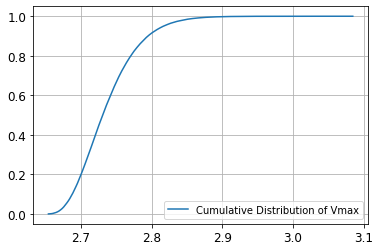

In [31]:
# plotting PDF and CDF
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.plot(bins_count[1:], cdf, label="Cumulative Distribution of Vmax")
plt.legend()
plt.grid()
plt.show()